# Data Analysis

Terminology
* Data-point/Data-vector.
* Data-set.
* Feature/Variable/Input-varibale/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



# Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


'''downlaod Iris.csv from https://www.kaggle.com/uciml/iris.
You may have to login to Kaggle to downlaod this data.'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("Iris.csv")
print "Success"

Success


In [7]:
# (Q) how many data-points and featrues are there?
print (iris.shape)

(150, 6)


In [8]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')


In [9]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["Species"].value_counts()

# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 2-D Scatter Plot

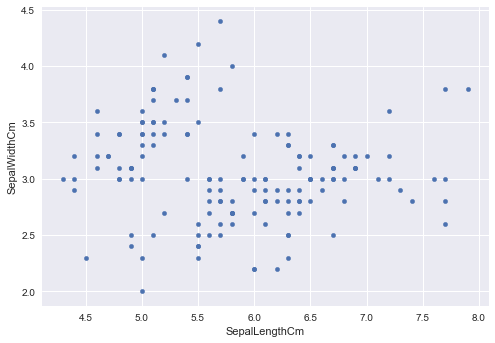

In [10]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

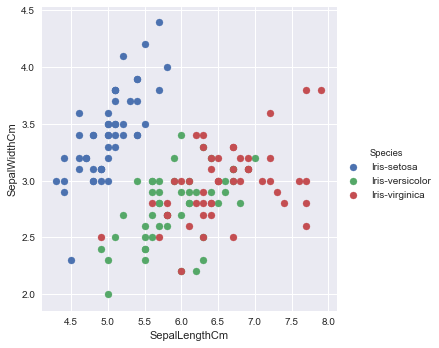

In [13]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

# # Pair-plot

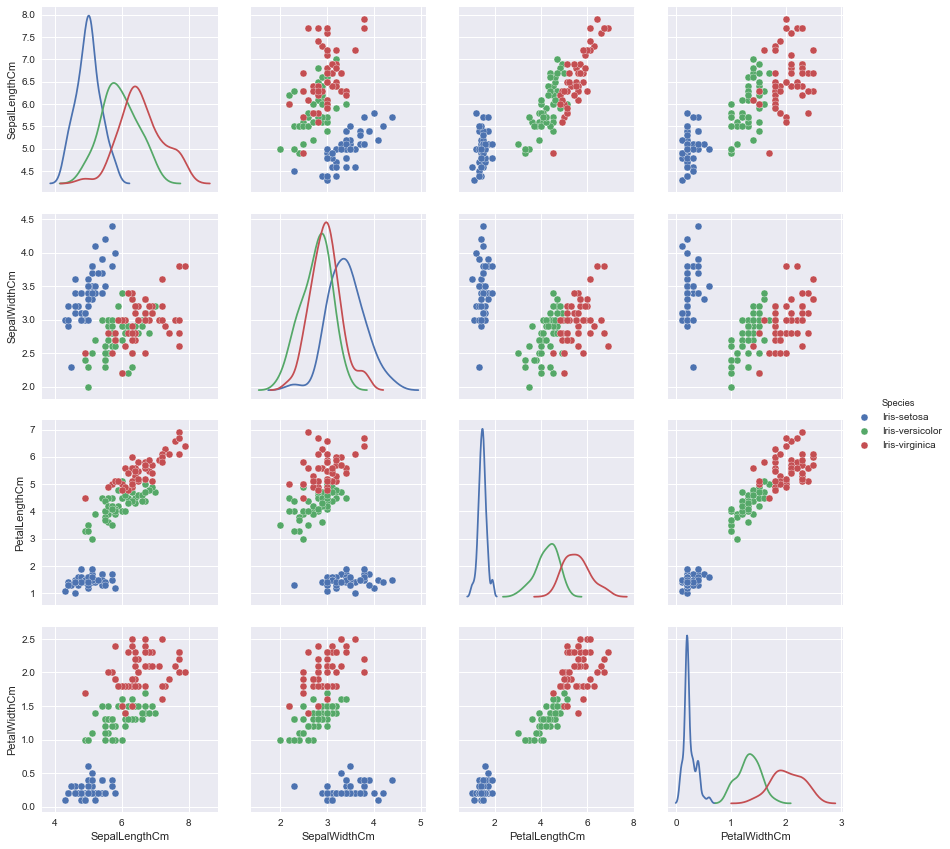

In [11]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. Only possible to view 2D patterns.
plt.close();
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde");
plt.show()


# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

In [97]:
# What about 3-D scatter plot?
# What about 1-D scatter plot using just one feature?

#TODO: Plot a 3-D scatter plot.
#TODO: Plot a 1-D Scatter plot using petal_length feature.


#Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

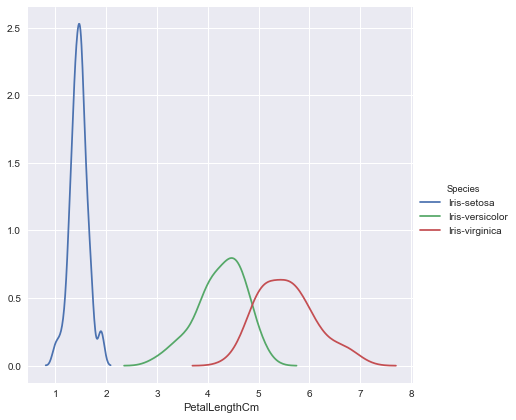

In [16]:
# Histograms and Probability Density Functions (PDF)
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.

#Seaborn plot of petal_length's PDF.
sns.FacetGrid(iris.drop("Id", axis=1), hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend();
plt.show();


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most found distributions in nature.


In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#TODO: Plot CDF of petal_length




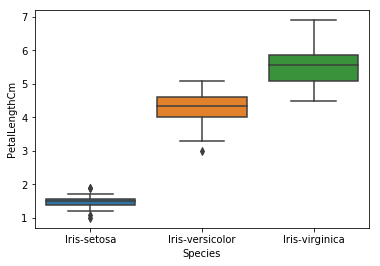

In [23]:
# Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: no standard way. Could use min and max or use other complex statistical techniques.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

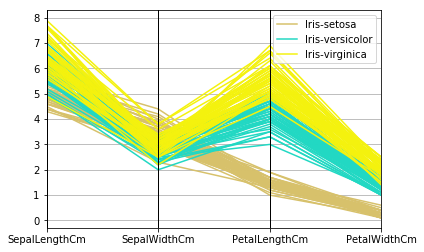

In [25]:
# Parallel-coordinates to visualizae data when we have more than 5 dimensions and pair-plot is too ahrd to understand.
# How to draw a parallel-coordinate plot.
# Diasadv: crowding, whats the correct order of the features/dimensions.

from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species");
plt.show();



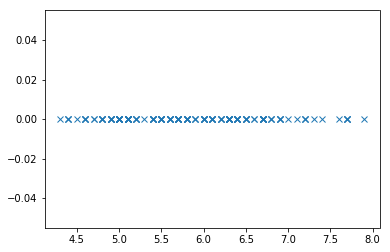

In [26]:
#1-D scatter plo of SepalLength
import numpy as np
plt.plot(iris['SepalLengthCm'], np.zeros_like(iris['SepalLengthCm']), 'x')
plt.plot(iris['SepalLengthCm'], np.zeros_like(iris['SepalWidthCm'])+2, 'x')
plt.plot(iris['PetalLengthCm'], np.zeros_like(iris['PetalLengthCm'])+4, 'o')
plt.plot(iris['PetalLengthCm'], np.zeros_like(iris['PetalWidthCm'])+6, 'o')
plt.show()

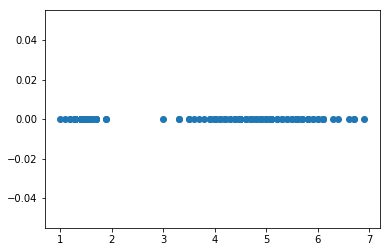

In [32]:
#1-D scatter plo of petal-lenght
import numpy as np
plt.plot(iris['PetalLengthCm'], np.zeros_like(iris['PetalLengthCm']), 'o')
plt.show()

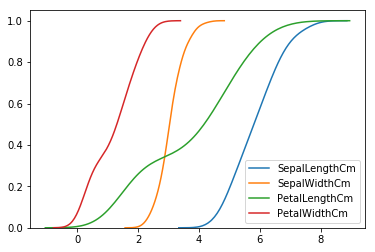

In [14]:
ax = sns.kdeplot(iris['SepalLengthCm'], cumulative=True)
ax = sns.kdeplot(iris['SepalWidthCm'], cumulative=True)
ax = sns.kdeplot(iris['PetalLengthCm'], cumulative=True)
ax = sns.kdeplot(iris['PetalWidthCm'], cumulative=True)
plt.show()